In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("Companies-profit.csv")
df

,R&D Spend,Administration,Marketing Spend,City,Profit
0,165349.20,136897.800,471784.1000,Mumbai,192261.83000
1,162597.70,151377.590,443898.5300,Bangalore,191792.06000
2,153441.51,101145.550,407934.5400,Delhi,191050.39000
3,144372.41,118671.850,383199.6200,Mumbai,182901.99000
4,142107.34,91391.770,366168.4200,Delhi,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,Bangalore,95279.96251
996,134970.00,130390.080,329204.0228,Bangalore,164336.60550
997,100275.47,241926.310,227142.8200,Bangalore,413956.48000
998,128456.23,321652.140,281692.3200,Bangalore,333962.19000


In [3]:
df.shape

(1000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
R&D Spend          1000 non-null float64
Administration     1000 non-null float64
Marketing Spend    1000 non-null float64
City               1000 non-null object
Profit             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df['City'].unique()

array(['Mumbai', 'Bangalore', 'Delhi'], dtype=object)

In [6]:
df_s = df['City']
#df_s
new_city = df_s.replace("Mumbai",1).replace("Bangalore",2).replace("Delhi",3)
new_city

0      1
1      2
2      3
3      1
4      3
      ..
995    2
996    2
997    2
998    2
999    1
Name: City, Length: 1000, dtype: int64

In [7]:
new_city.value_counts()

2    344
1    334
3    322
Name: City, dtype: int64

# EDA

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Profit'],y= df['R&D Spend'],alpha=0.2)
plt.show();

<Figure size 640x480 with 1 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8DEE2ED88>,
      dtype=object)

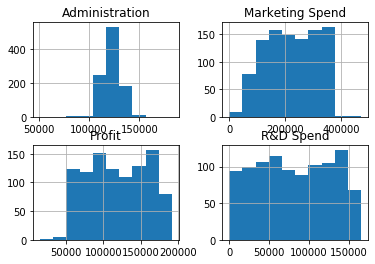

In [30]:
df.hist()

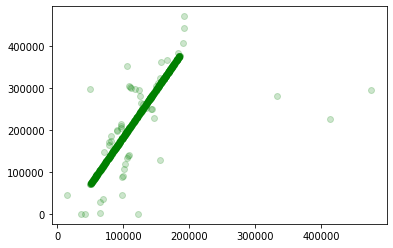

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Profit'],y= df['Marketing Spend'],color='green',alpha=0.2)
plt.show();

In [10]:
corr = df.corr()

In [11]:
import seaborn as sns
from scipy.stats import pearsonr

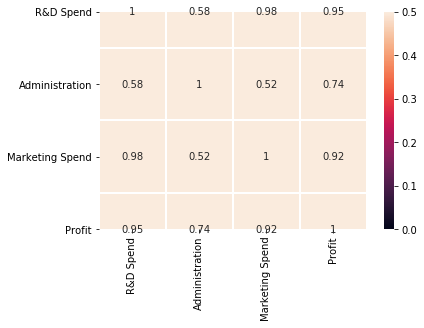

In [12]:
sns.heatmap(corr, vmin=0,
    vmax=0.5,
    annot=True,
    linewidth = 0.7)

(array([ 83., 346., 305., 263.,   0.,   0.,   1.,   0.,   1.,   1.]),
 array([ 14681.4  ,  60861.803, 107042.206, 153222.609, 199403.012,
        245583.415, 291763.818, 337944.221, 384124.624, 430305.027,
        476485.43 ]),
 <a list of 10 Patch objects>)

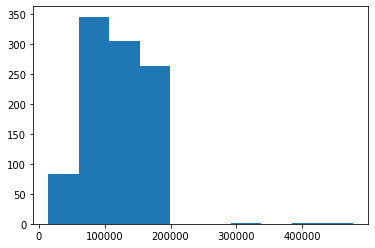

In [13]:
plt.hist(df['Profit'])

(array([  8.,  78., 140., 157., 149., 142., 159., 163.,   2.,   2.]),
 array([     0.  ,  47178.41,  94356.82, 141535.23, 188713.64, 235892.05,
        283070.46, 330248.87, 377427.28, 424605.69, 471784.1 ]),
 <a list of 10 Patch objects>)

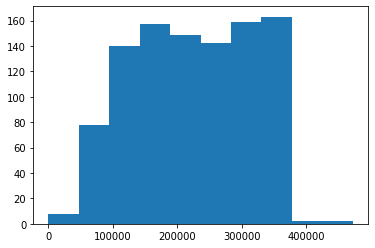

In [14]:
plt.hist(df['Marketing Spend'])

# Data Cleaning

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8deee1dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8deee8d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8deee12c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8deeeed08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8deeeee08>],
 'means': []}

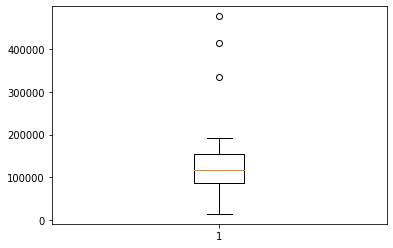

In [15]:

plt.boxplot(df['Profit'])
#plt.boxplot(df['Marketing Spend'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8def4d888>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8def4dfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8def47d88>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8def50f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8def55f48>],
 'means': []}

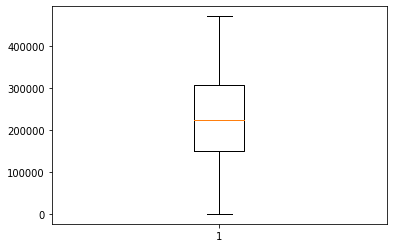

In [16]:
plt.boxplot(df['Marketing Spend'])

In [17]:
#dropping outliers
df =df.drop(df[df.Profit > 300000].index)


# Model Formation And Predicting

In [18]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'City', 'Profit'], dtype='object')

In [19]:
#dividing the data 

X= df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state =0 )

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#prediction
y_pred = reg.predict(X_test)

In [25]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
270,170174.83270,170256.862759
725,177513.19560,177606.818266
31,97483.56000,97372.343148
342,172384.03020,172469.550181
604,178552.86820,178648.133265
...,...,...
75,60947.70089,60857.181628
453,85529.93509,85478.249104
467,145240.63050,145283.271224
385,51690.59960,51585.456617


# performance of the model

In [26]:
from sklearn import metrics
import numpy as np
print("Mean Squared Error is : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error is :  1912.744577208359


In [27]:
print("MAE:", metrics.mean_absolute_error(y_pred, y_test))

MAE: 364.17051094433117


ValueError: continuous is not supported